# $$ Práctica\ Final $$
### $$Análisis\ descriptivo$$
##### $$ Mariana\ Lugo\ Ibarra\ y\ Miguel\ Ángel\ Reyes\ Retana$$


In [193]:
options(repr.plot.width=8, repr.plot.height=8)
library(readxl)
library(ggplot2)
library(dplyr)
library(tidyverse)
library(stringr)

## Hipotesis de Investigación:

La motivación de la investigación resulta del trabajo realizado por el economista Raj Chetty en Estados Unidos donde se observa que existe una relación negativa entre el ingreso promedio de un barrio y el número de casos confirmados con SARS-COVID-19. 

El trabajo pretende investigar si existe una relación negativa entre defunciones, casos confirmados con SARS-COVID-19 y el ingreso promedio de un municipio.  

## Datos:

Para la investigación se obtienen los datos públicos del COVID-19 en México, datos de pobreza del CONEVAL, datos de incidencia delictiva del fuero común del Secretariado Ejecutivo del Sistema Nacional de Seguridad Pública (SESNSP), y datos privados y anonimizados de precios promedio de viviendas financiadas por Infonavit y el salario diario integrado promedio de acreditados del Infonavit.

El nivel de análisis es municipal.

A continuación se presentan los datos de las distintas fuentes:

$COVID-19$: 
* Se utilizan los datos diarios de los casos confirmados y defunciones reportados en https://coronavirus.gob.mx/datos/ por municipio. El corte de información es al 17 de julio de 2020.

In [199]:
datos<-read.csv("Datos/datos.csv")

In [200]:
#Estadística descriptiva
summary (datos)

       X            CV_MUN       precio_mean       salario_mean   
 Min.   :   1   Min.   : 1001   Min.   : 116583   Min.   : 1.003  
 1st Qu.: 380   1st Qu.:13077   1st Qu.: 369851   1st Qu.: 4.085  
 Median : 759   Median :20002   Median : 450000   Median : 5.728  
 Mean   : 759   Mean   :19446   Mean   : 521435   Mean   : 6.508  
 3rd Qu.:1138   3rd Qu.:28037   3rd Qu.: 573333   3rd Qu.: 7.912  
 Max.   :1517   Max.   :32057   Max.   :3184562   Max.   :25.000  
                                                                  
   poblacion                   nombre     confirmados_total  defunciones_total
 Min.   :    679   Benito Juarez  :   6   Min.   :    0.00   Min.   :   0.00  
 1st Qu.:  12013   Emiliano Zapata:   5   1st Qu.:    7.00   1st Qu.:   1.00  
 Median :  25266   Juarez         :   5   Median :   22.00   Median :   3.00  
 Mean   :  79199   Ocampo         :   5   Mean   :  216.12   Mean   :  24.94  
 3rd Qu.:  60898   Abasolo        :   4   3rd Qu.:   84.25   3rd Qu.:

In [201]:
#plot (datos)

In [202]:
head (datos)

X,CV_MUN,precio_mean,salario_mean,poblacion,nombre,confirmados_total,defunciones_total,ts_promedio_h,ts_promedio_r,Entidad,Nombre_ent,pob_porc_2015,pob_per_2015
1,1001,450371.7,4.767035,961977,Aguascalientes,2465,173,13.99895,225.47317,1,Aguascalientes,26.1,"224,949"
2,1002,351536.1,3.952249,50864,Asientos,48,5,22.60931,35.06082,1,Aguascalientes,54.0,"25,169"
3,1003,418039.4,3.360099,60760,Calvillo,84,1,17.55541,58.42660,1,Aguascalientes,56.8,"29,951"
4,1004,368355.9,3.782037,16918,Cosio,49,0,20.68802,45.31663,1,Aguascalientes,43.2,"6,620"
5,1005,672823.9,7.371576,130184,Jesus Maria,104,2,16.38706,114.83746,1,Aguascalientes,25.0,"31,479"
6,1006,388481.6,4.334164,50032,Pabellon de Arteaga,113,6,17.32225,54.96482,1,Aguascalientes,34.9,"15,972"


In [203]:
#Defunciones por estado
df1<- aggregate(datos[7:8], by=list(datos$Entidad), FUN=sum) 
#Agregamos variable entidad
set.seed(4)
entidad <-  (c(1:32))
df1 <- cbind(df1,entidad)
df1$entidad <- factor (df1$entidad,
                      labels = c ("Aguascalientes", "Baja California", "BCS", 
                                 "Campeche", "Chiapas","Coahuila", "Colima",
                                 "Durango","CdMx", "Durango", "Guanajuato", "Guerrero",
                                 "Hidalgo", "Jalisco", "Estado de México", "Michoacán",
                                 "Morelos", "Nayarit", "N.L", "Oaxaca", "Puebla",
                                 "Querétaro", "Q.Roo", "SLP", "Sinaloa", "Sonora",
                                 "Tabasco", "Tamaulipas","Tlaxcala", "Veracruz",
                                 "Yucatán", "Zacatecas"))

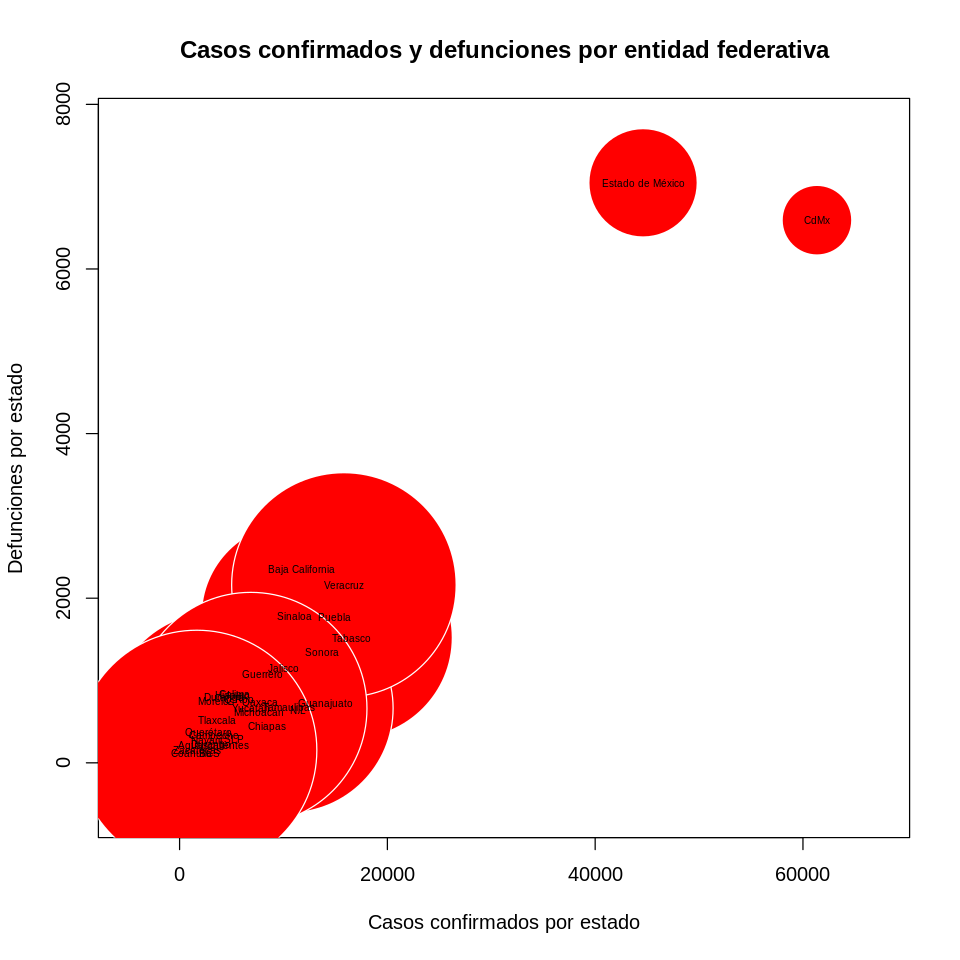

In [207]:
symbols (df1$confirmados_total, df1$defunciones_total, circles=df1$entidad, main = "Casos confirmados y defunciones por entidad federativa",
        fg="white", bg="red", xlab="Casos confirmados por estado",
        ylab="Defunciones por estado")
text(df1$confirmados_total, df1$defunciones_total, df1$entidad, cex=0.5)

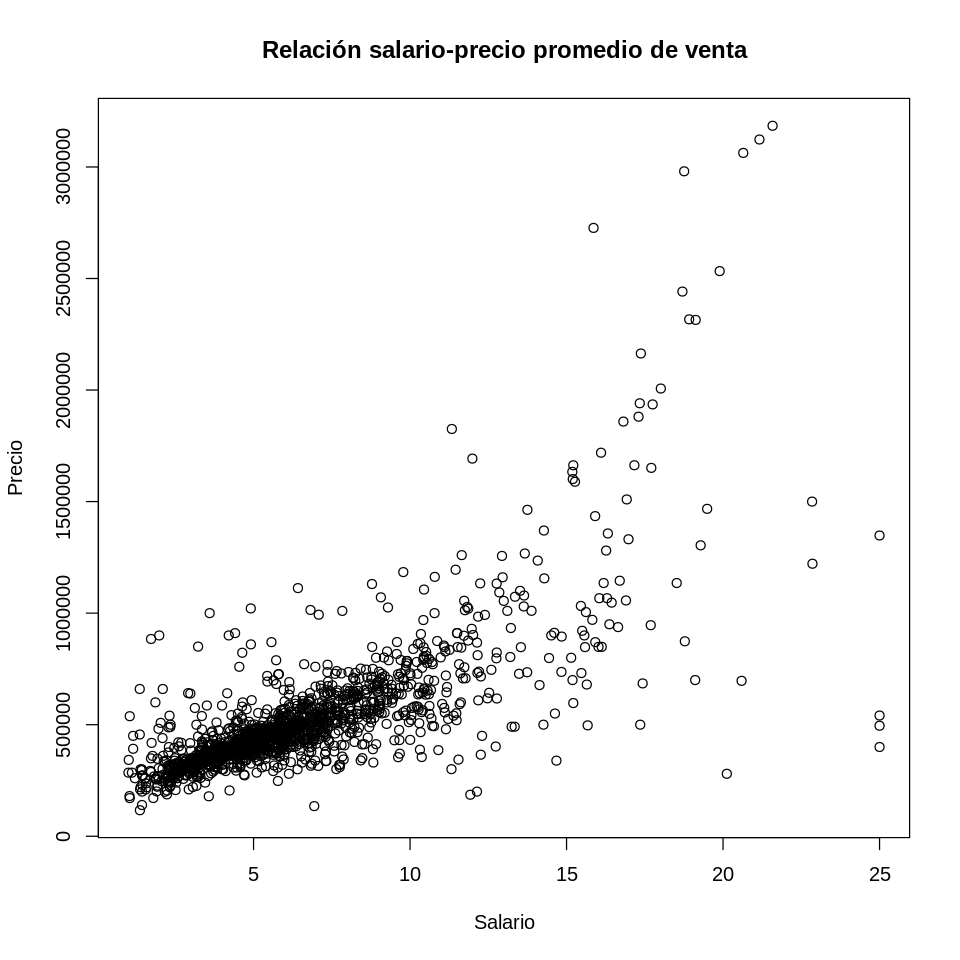

In [30]:
#Relación salario y precio de casa
plot(datos$salario_mean, datos$precio_mean, main="Relación salario-precio promedio de venta",
     xlab="Salario", ylab="Precio")

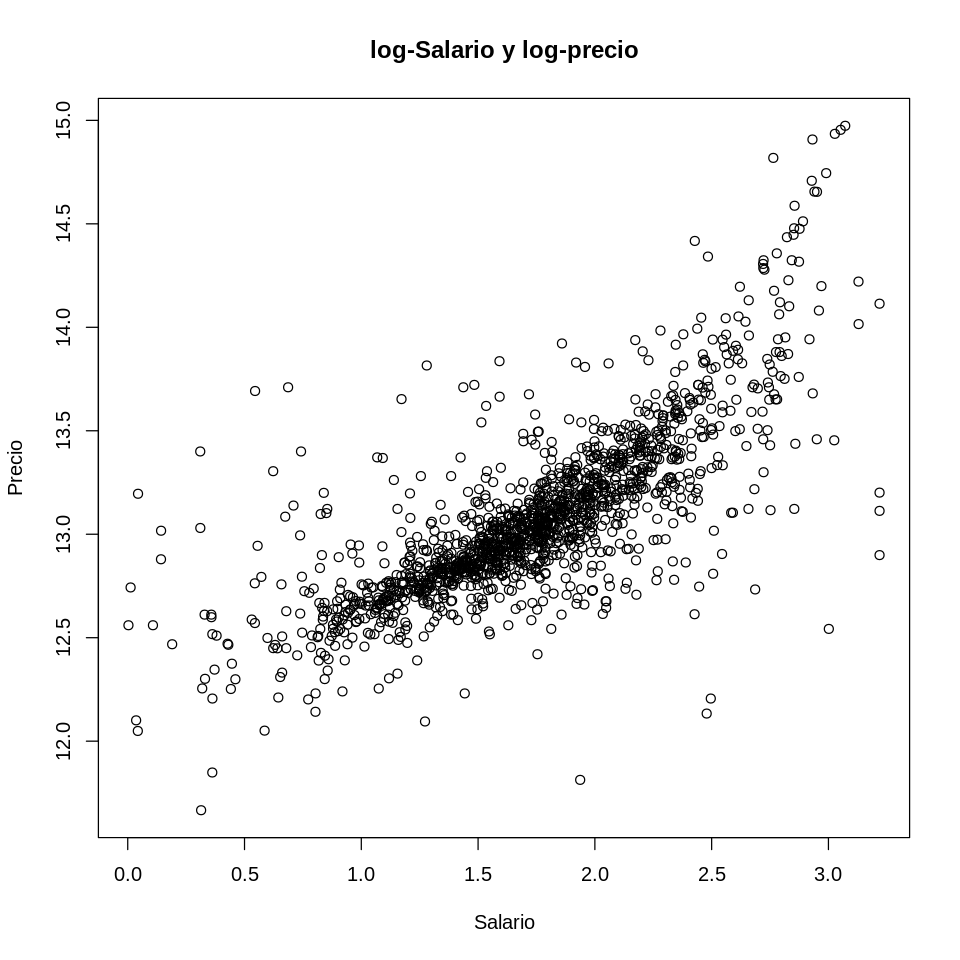

In [31]:
#Con logaritmo al salario y al precio
plot(log(datos$salario_mean), log(datos$precio_mean), main="log-Salario y log-precio",
     xlab="Salario", ylab="Precio")

In [32]:
#Correlación entre el salario y el préstamo obtenido para la vivienda
cor(x=datos$salario_mean, y=datos$precio_mean)

[1] 0.7405319

Warning message:
“Removed 1 rows containing missing values (geom_point).”

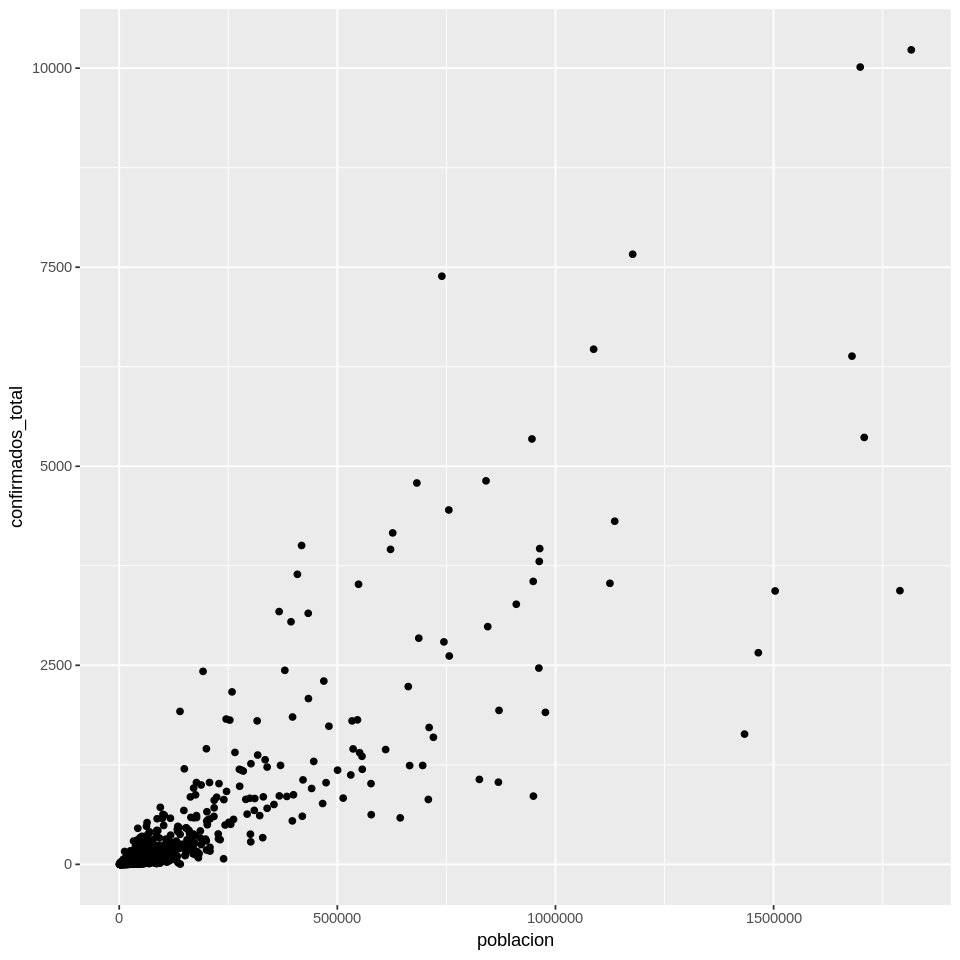

In [210]:
#Relación entre población y casos confirmados
ggplot(data=datos, aes(x=poblacion, y=confirmados_total)) + geom_point()

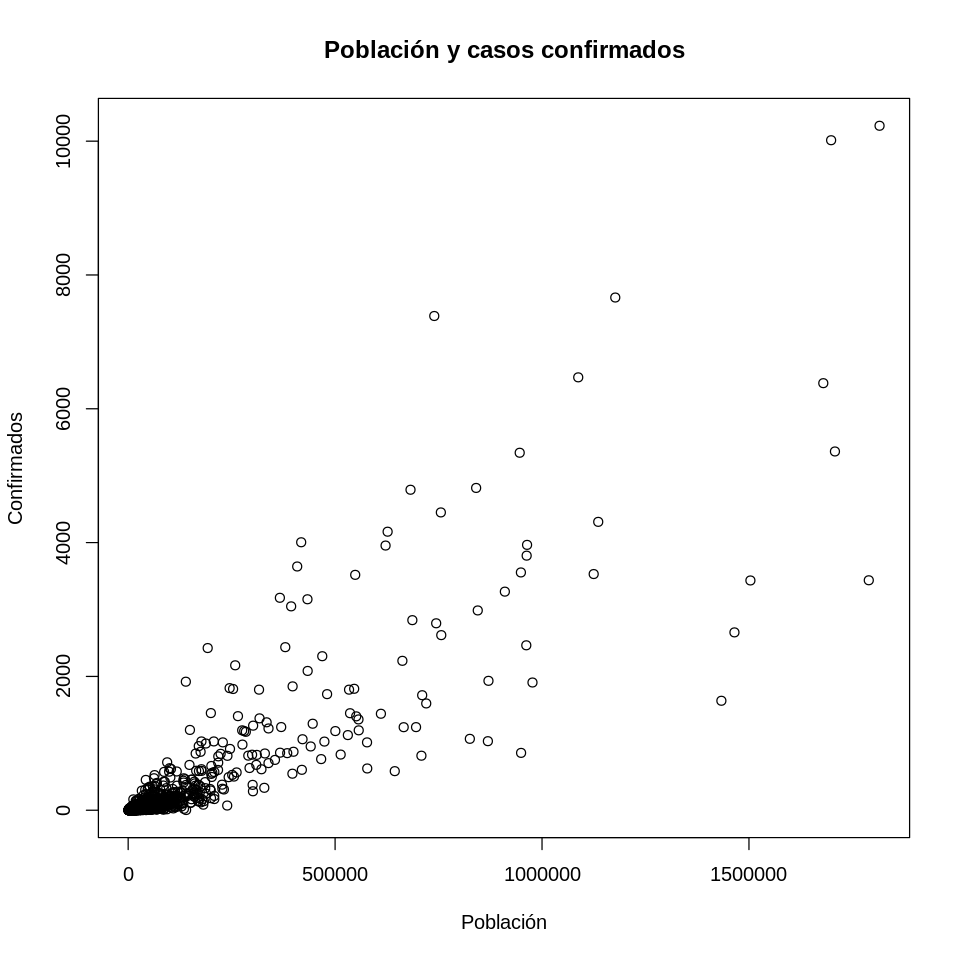

In [211]:
#Relación población y confirmados
plot(datos$poblacion, datos$confirmados_total, main="Población y casos confirmados",
     xlab="Población", ylab="Confirmados")

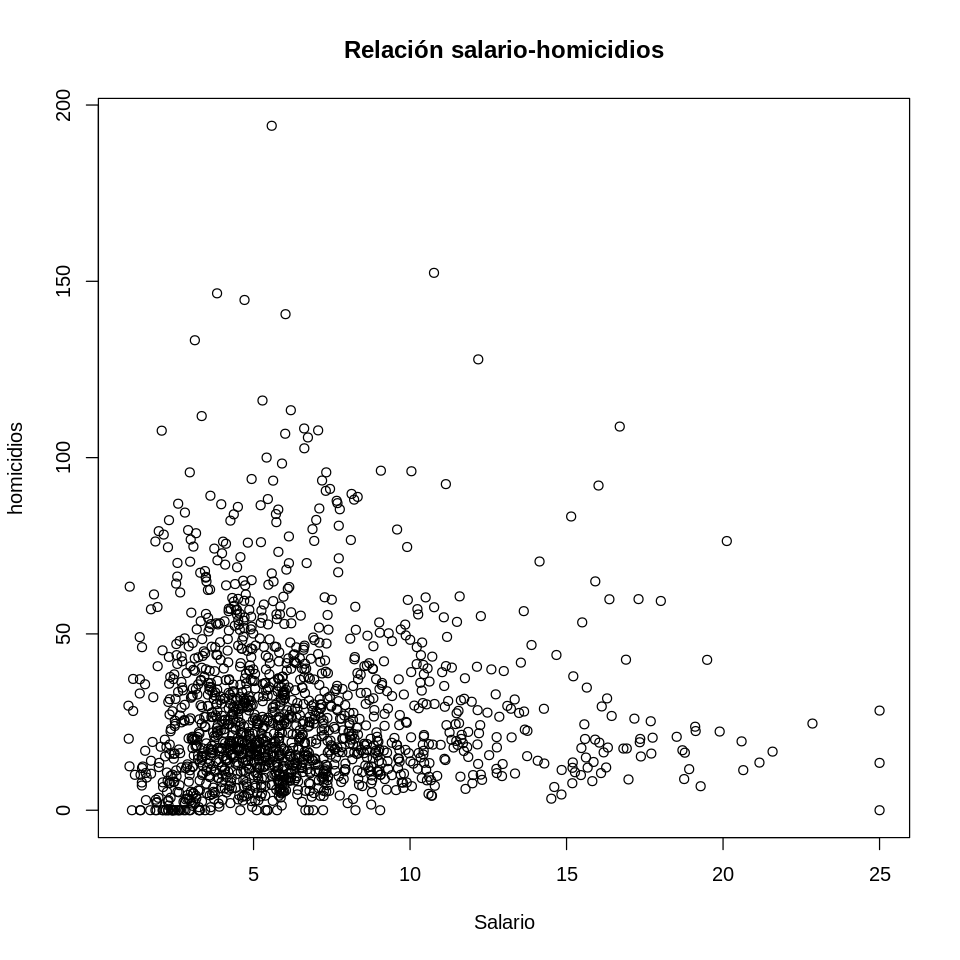

In [36]:
#Relación salario y homicidios
plot(datos$salario_mean, datos$ts_promedio_h, main="Relación salario-homicidios",
     xlab="Salario", ylab="homicidios")

In [37]:
#Correlación entre el salario y homicidios
cor(x=datos$salario_mean, y=datos$ts_promedio_h)

[1] NA

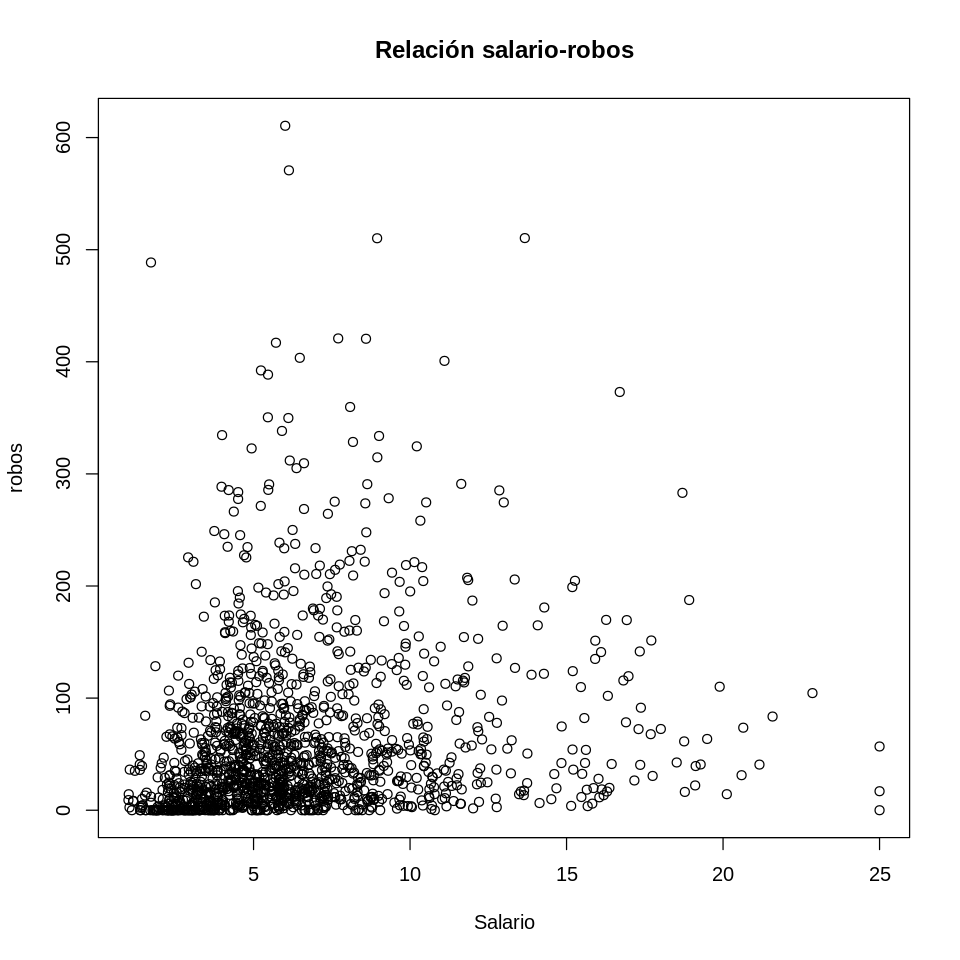

In [38]:
#Relación salario y robos
plot(datos$salario_mean, datos$ts_promedio_r, main="Relación salario-robos",
     xlab="Salario", ylab="robos")

In [39]:
#Correlación entre el salario y robos
cor(x=datos$salario_mean, y=datos$ts_promedio_r)

[1] NA

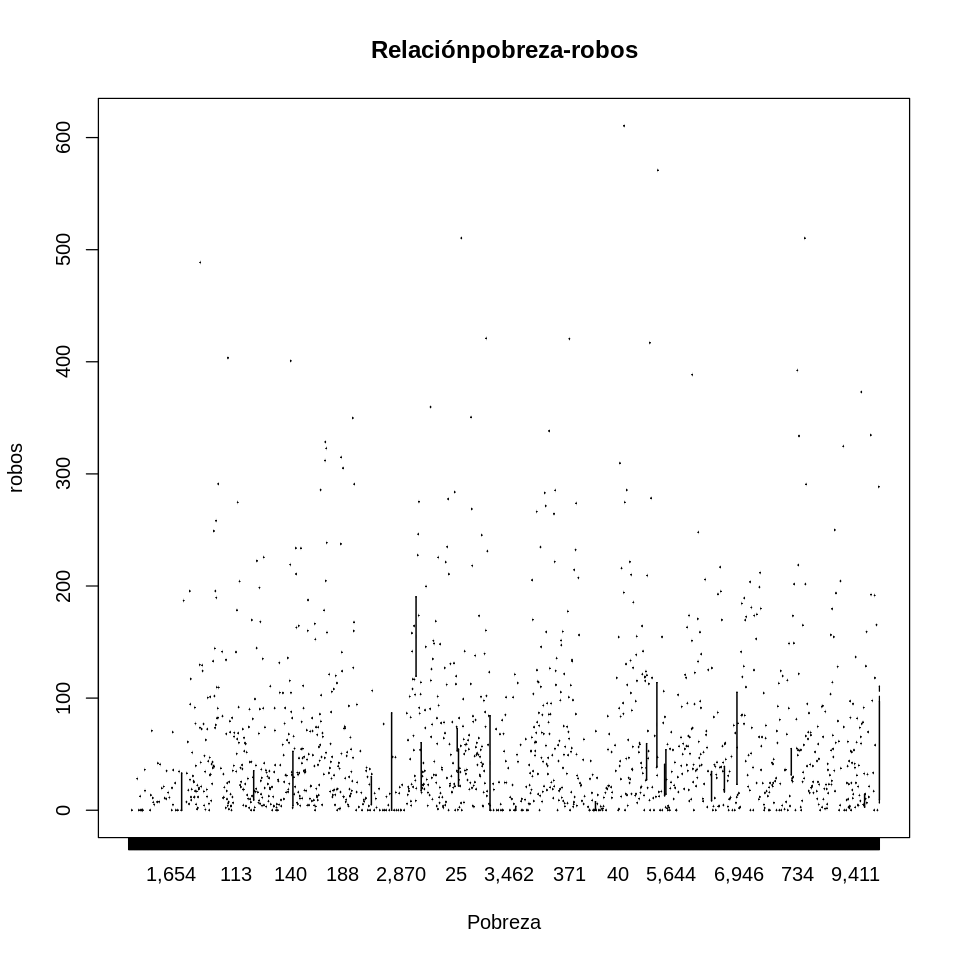

In [40]:
#Relación salario y robos
plot(datos$pob_per_2015, datos$ts_promedio_r, main="Relaciónpobreza-robos",
     xlab="Pobreza", ylab="robos")